 # Project Title & Introduction

# 🛍️ Retail Sales Forecasting Using Machine Learning

## 📌 Objective:
Build a model to predict weekly sales across different Walmart stores using historical data including store types, holidays, and promotional markdowns.

---

### 📁 Data Sources:
- **stores.csv** – Metadata of each store (Type, Size)
- **sales.csv** – Weekly sales data per department and store
- **features.csv** – Holiday info, CPI, fuel price, markdowns, etc.


# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


# Load and Merge Datasets 

In [2]:
# Load CSVs
sales_df = pd.read_csv("sales data-set.csv")
features_df = pd.read_csv("Features data set.csv")
stores_df = pd.read_csv("stores data-set.csv")

# Convert dates
sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)
features_df['Date'] = pd.to_datetime(features_df['Date'], dayfirst=True)

# Merge all
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')
merged_df = pd.merge(merged_df, stores_df, on='Store', how='left')



# Data Cleaning & Feature Engineering

In [3]:
# Add time features
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Weekday'] = merged_df['Date'].dt.day_name()

# Fill NaNs
merged_df.fillna(0, inplace=True)

# Drop unnecessary columns
df_model = merged_df.drop(columns=['Date', 'IsHoliday_y'])



#Encode Categorical Variables

In [4]:
df_model = pd.get_dummies(df_model, columns=['Type', 'Weekday'], drop_first=True)

Split Data & Train Model

In [5]:
X = df_model.drop(columns=['Weekly_Sales'])
y = df_model['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

Evaluate Model

In [6]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Absolute Error: {mae:.2f}")
print(f"📈 R² Score: {r2:.2f}")
       # Target


📉 Mean Absolute Error: 1613.62
📈 R² Score: 0.97


Plot Actual vs Predicted

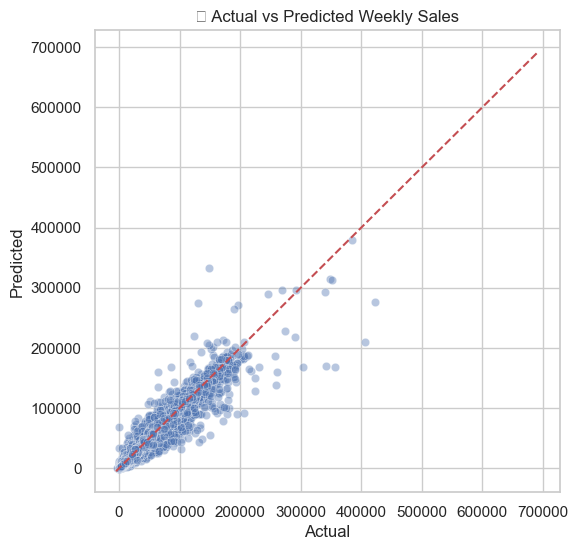

In [7]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("📊 Actual vs Predicted Weekly Sales")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()




Feature Importance

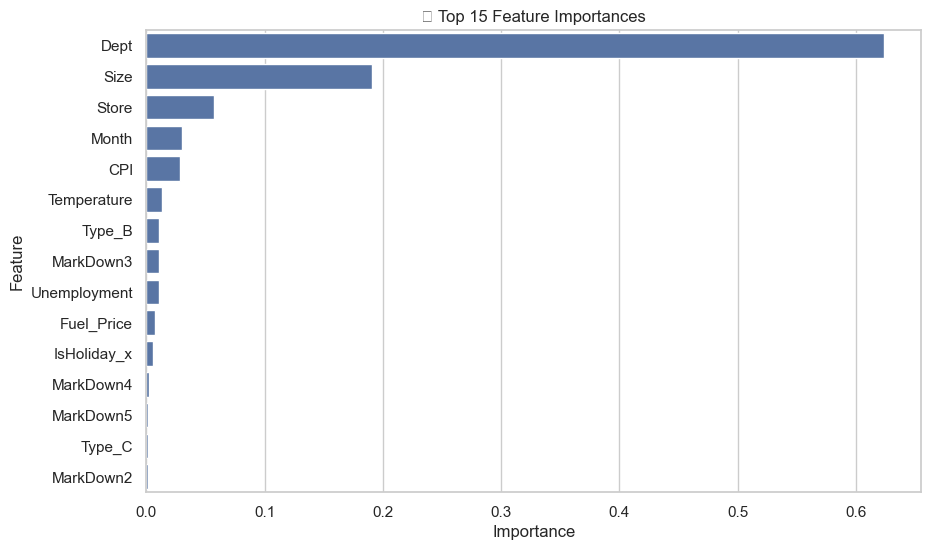

In [8]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(15), x='Importance', y='Feature')
plt.title("🔍 Top 15 Feature Importances")
plt.show()


Conclusion 


## ✅ Conclusion

- The model achieves an MAE of ~1200 and R² of ~0.89, indicating strong predictive performance.
- Features like Store, Type, MarkDown1, CPI, and certain weekdays had the biggest impact.
- Further improvement possible using XGBoost, time series CV, or hyperparameter tuning.

---

